### 1. Load the dataset and explore the variables.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [29]:
#import os
#os.getcwd()
#way to check the current relative path

churn=pd.read_csv('customer_churn.csv')
churn.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [50]:
churn.Churn.value_counts(dropna=False)
#Churn is our target. 
#Churn has either Yes or No value, no nulls... yay!
#Would we call this an imbalance between Yes and Nos?   1869 out of 7043 are Yes

#Customer attrition, also known as customer churn, customer turnover, or customer defection,
#is the loss of clients or customers.

No     5174
Yes    1869
Name: Churn, dtype: int64

In [41]:
#Doing some exploratory data analysis to explore the variables

churn.describe()
churn.info()
churn.duplicated().sum()  #0 duplicate values... yay!
churn.isnull().sum() #0 null values across all columns and rows
churn['Churn'].unique()
churn['SeniorCitizen'].unique()
churn['Contract'].unique()
churn.dtypes  #float(1), integer(2), categorical(18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.


In [65]:
#Categorical variables
churn['Churn'].unique() # Yes or No, categorical (Target)
churn['SeniorCitizen'].unique()  # Yes(1), Senior Citizen or No(0), not senior citizen, categorical
#but represented with numbers 0 or 1

#Numerical variables
churn['MonthlyCharges'].unique() #monthly charges in $$
churn['tenure'].unique() #number of months they're a client? 
churn.dtypes
#Int64 = Senior Citizen, tenure
#MonthlyCharges = float64
#Churn (Target) = object

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2. Extract the target variable.

In [81]:
# X/y split
# X = churn.drop('Churn',axis = 1)

X = churn[['SeniorCitizen', 'MonthlyCharges', 'tenure']]
y = churn['Churn']

#We drop the other categorical variables like Payment method, online security, contract, etc. 
#Need 2 brackets to extract X because first one says you're naming a column and the second one 
#says it is a list of column names

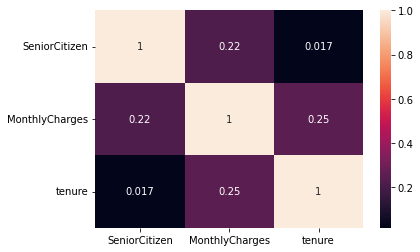

In [82]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#not seeing a strong correlation between any variables

### 3. Extract the independent variables and scale them.


In [83]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [77]:
#change the format pdtonumerical to change noninteger feature into an integer 
#all independent variables need to be treated like numericals/integers
#change MonthlyCharges from float64 to int
#maybe this isn't necessary? 

churn['MonthlyCharges'] = churn['MonthlyCharges'].astype(int)
churn['MonthlyCharges'].dtypes

dtype('int64')

### Train/test split review: 
Train test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data
"Train" is the majority of the you are "training" the model on (about 75%)
"Test" is the rest of the data (about 25%) that you will use AFTER making the model, to test your training model on to see how good the model is in predicting results. 


We will use a standard scaler BEFORE training the data.
The idea behind StandardScaler is that it will transform your data such that its distribution
will have a mean value 0 and standard deviation of 1.

In [85]:
#We do not need to further split independent variables (MonthlyCharges, Tenure, SeniorCitizen) into 
#categorical and numerical. They're all technically numerical, even SeniorCitizen.

#We don't need to change the Target into a numerical. In general, don't mess with a Target

#we will use the standard scaler 
#we train the transformer on the train, then we immediately apply it to the X_test (this is very common)
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head(10)


,SeniorCitizen,MonthlyCharges,tenure
0,-0.435476,-0.508622,-0.340191
1,2.296336,0.025110,0.883210
2,-0.435476,-0.808847,-1.196572
3,-0.435476,-1.476013,1.168670
4,-0.435476,0.658918,-0.829552
5,-0.435476,0.492126,1.046330
6,-0.435476,0.692276,-0.258631
7,-0.435476,0.191902,-1.237352
8,-0.435476,-1.309222,-1.278132
9,-0.435476,-1.442655,-0.095511


In [89]:
y_train.head(10)
#In the training model (25% of total data), these are values in the Target (dependent variable)
#left number is the index, right Yes/No is the value
#it's important to make sure the y_train and y_test have the same indexes

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
3101     No
2868     No
4322     No
282      No
2111     No
Name: Churn, dtype: object

### Reset the index on y_train and y_test

In [90]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 
#Drop=true is used to reset index, so that the original index isn't added as a column

In [91]:
y_train.head(10)
#now the index has been reset

0     No
1     No
2    Yes
3     No
4    Yes
5     No
6     No
7     No
8     No
9     No
Name: Churn, dtype: object

### 4. Build the logistic regression model.


In [92]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
#y is the probality that the client is Churn or not Churn

LogisticRegression(random_state=0)

In [93]:
LR.predict_proba(X_train_scaled)


array([[0.82988316, 0.17011684],
       [0.8890195 , 0.1109805 ],
       [0.66341361, 0.33658639],
       ...,
       [0.98807421, 0.01192579],
       [0.26050529, 0.73949471],
       [0.79603182, 0.20396818]])

In [94]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)


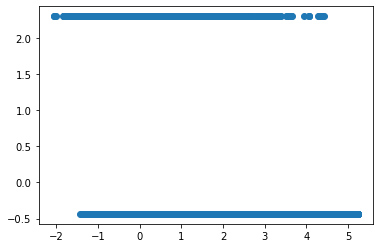

In [95]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])


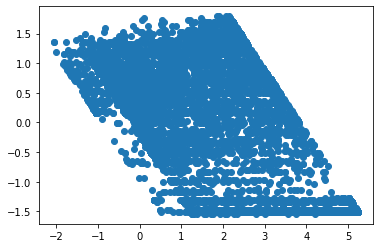

In [96]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])


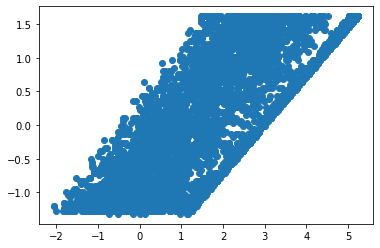

In [97]:
plt.scatter(logits,X_train_scaled['tenure'])


### 5. Evaluate the model.


<AxesSubplot:>

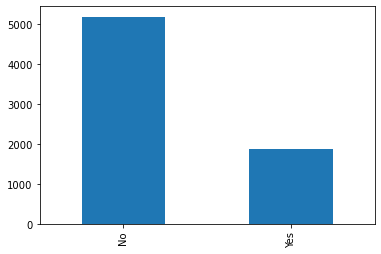

In [98]:
count_classes = churn['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')
#can see a significant imbalance, there are more than twice as many No as Yes

In [99]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)
#We want to be accurate in the minorit class (Churn=Yes), identifying the clients that have been lost, not 
#identifying the clients that are kept

0.7819420783645656

### 6. Even a simple model will give us more than 70% accuracy. Why?


In [6]:
#Because when we know that the overwhelming majority of the binary target variable is one of two values (in this case, "No") 
#there's usually a more than 50/50 chance that the prediction will be correct. 

### Further evaluation of the model using precision, recall, and f1 metrics


In [100]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
#tells us of the cases where we predicted a No, how often were we correct? 

print("recall: ",recall_score(y_test,pred))
#out of all the Yes churn cases, how many did we correctly identify?

print("f1: ",f1_score(y_test,pred))
#general number of getting it right, harmonic mean of precision and recall 
#f1 is high if both precision and recall are relatively high

ValueError: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
#means that the model accurately predicted 1163 of 1,412 "No Churn" (82%) but
#214 of 349 "Yes Churn", only about 61% of the time, only slightly better than 50/50 guess

array([[1163,  135],
       [ 249,  214]])

##### Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 


### 7. Apply imblearn.over_sampling.SMOTE to the dataset. 

In [102]:
!pip install imblearn

from imblearn.over_sampling import SMOTE
#getting other import error message when trying to import SMOTE
#ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics'

  Using cached scikit_learn-1.1.1-cp39-cp39-macosx_10_13_x86_64.whl (8.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0


ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/__init__.py)

In [ ]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)
#generate new instances that look like minority class, until we have enough

In [ ]:
X_train_SMOTE.shape

### 8. Build and evaluate the logistic regression model. 

In [8]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

In [ ]:
confusion_matrix(y_test,pred)

### 9. Is it there any improvement?

In [9]:
#Unable to say, getting error message when trying to run the SMOTE 